# HW5: Q1/Practical
## **Skill discovery using information theoretic objectives: DIAYN**


*This exercise has been adopted from [this repository](https://github.com/p-christ/Deep-Reinforcement-Learning-Algorithms-with-PyTorch.git). We have removed or changed some files to make it more suitable for this homework.*

In [ ]:
import warnings
from google.colab import drive


warnings.filterwarnings('ignore')
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Requirements

### MuJoCo

In [ ]:
# from https://colab.research.google.com/drive/1KGMZdRq6AemfcNscKjgpRzXqfhUtCf-V?usp=sharing#scrollTo=TtWrmOCKHD6I
!apt-get install -y \
    libgl1-mesa-dev \
    libgl1-mesa-glx \
    libglew-dev \
    libosmesa6-dev \
    software-properties-common > /dev/null 2>&1

!apt-get install -y patchelf > /dev/null 2>&1

### Main repository
**NOTE**: You may need to change the path below.

In [ ]:
%cd /content/drive/MyDrive/MSC1400_1/AML/HW5/Practical/P1/DIAYN
!pip install -r requirements.txt 

/content/drive/.shortcut-targets-by-id/1jVF0l3bytDY-MS-KhOIIc2p9Lv67nImE/MSC1400_1/AML/HW5/Practical/P1/DIAYN
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Visualization 

In [ ]:
!pip install easyprocess==1.1 2>&1
!apt-get update > /dev/null 2>&1
!apt-get install cmake > /dev/null 2>&1
!pip install --upgrade setuptools 2>&1
!pip install ez_setup > /dev/null 2>&1
!pip install gym[atari] > /dev/null 2>&1
!pip install gym pyvirtualdisplay==3.0 > /dev/null 2>&1
!apt-get install -y xvfb python-opengl ffmpeg > /dev/null 2>&1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.2 MB 34.9 MB/s 
  Attempting uninstall: setuptools
    Found existing installation: setuptools 57.4.0
    Uninstalling setuptools-57.4.0:
      Successfully uninstalled setuptools-57.4.0


## DIAYN

In this notebook, you will complete the implementation of the skill discovery method described in [Diversity is All You Need: Learning Skills without a Reward Function](https://arxiv.org/abs/1802.06070). You can refer to the paper and course slides for a recap. 
It is recommended to look at the files in `DIAYN/` briefly to understand your provided interfaces. In particular, you have implementations of SAC and DDQN to use for the low-level and high-level agents respectively. The low-level agent acts in the action space of the original environment, but its policy is conditioned on the skill and the reward comes from the unsupervised objective given in the paper:
$$r_z(s,a)= log q_\phi(z|s) - p(z)$$
The high-level agent acts in the same state space as the original environment, but its actions are chosen from the skill-set of the low-level agent and used as the input skill for the low-level policy which is conditioned on skill. The high-level reward for each action (i.e. skill) is the sum of environment rewards from the sequence of the executed low-level actions.
So, we have two wrapper environments with the following specifications:
- **Skill wrapper**: This wrapper appends the skill value to the original observation from the environment to make any arbitrary policy skill-conditioned. At each step, after executing the given action, it calculates the reward according to $r_z(s, a)$.
- **Manager agent wrapper**: This wrapper actually corresponds to a high-level environment in which an agent chooses actions from the skill set of the low-level agent, and the low-level agent has to condition its policy on the selected skill for several timesteps and then yield the control to the high-level policy to receive and try new skills. The state-space here is the same as the original environment and the reward for every action (i.e. skill) is the sum of per-low-level-action reward from the environment.
In this notebook, you are supposed to use a SAC agent on the skill wrapper and a DDQN agent on the manager agent wrapper. You can use `SAC` from `agents/actor_critic_agents/SAC.py` and `DDQN` from `agents/dqn_agents/DDQN.py` (see the files and the comments in the following cells to become familiar with their useful methods).
Please consider the questions you are supposed to answer and complete the `DIAYN` class in the following cell accordingly. You may change the value of any hyperparameter as you wish.

### Implementations (25 points)

In [ ]:
# from https://colab.research.google.com/drive/1flu31ulJlgiRL1dnN2ir8wGh9p7Zij2t#scrollTo=8nj5sjsk15IT
import gym
import glob
import io
import base64
from gym.wrappers import Monitor
from IPython.display import HTML
from pyvirtualdisplay import Display
from IPython import display as ipythondisplay


display = Display(visible=0, size=(1400, 900))
display.start()

"""
Utility functions to enable video recording of gym environment 
and displaying it.
To enable video, just do "env = wrap_env(env)""
"""

def show_video():
    mp4list = glob.glob('video/*.mp4')
    if len(mp4list) > 0:
        mp4 = mp4list[0]
        video = io.open(mp4, 'r+b').read()
        encoded = base64.b64encode(video)
        ipythondisplay.display(HTML(data='''<video alt="test" autoplay 
                loop controls style="height: 400px;">
                <source src="data:video/mp4;base64,{0}" type="video/mp4" />
             </video>'''.format(encoded.decode('ascii'))))
    else:
        print("Could not find video")

def wrap_env(env):
    env = Monitor(env, './video', force=True)
    return env

You can use `show_videos` and `wrap_env` methods to record episodes as shown in the following example. In this example, an episode of random policy for `Hopper-v2` is shown.

In [ ]:
env = wrap_env(gym.make('Hopper-v2'))
state = env.reset()

while True:
    env.render()
    action = env.action_space.sample()
    state, reward, done, info = env.step(action)
    if done:
        break

env.close()
show_video()

Compiling /usr/local/lib/python3.7/dist-packages/mujoco_py/cymj.pyx because it changed.
[1/1] Cythonizing /usr/local/lib/python3.7/dist-packages/mujoco_py/cymj.pyx
running build_ext
building 'mujoco_py.cymj' extension
creating /usr/local/lib/python3.7/dist-packages/mujoco_py/generated/_pyxbld_2.0.2.13_37_linuxcpuextensionbuilder
creating /usr/local/lib/python3.7/dist-packages/mujoco_py/generated/_pyxbld_2.0.2.13_37_linuxcpuextensionbuilder/temp.linux-x86_64-cpython-37
creating /usr/local/lib/python3.7/dist-packages/mujoco_py/generated/_pyxbld_2.0.2.13_37_linuxcpuextensionbuilder/temp.linux-x86_64-cpython-37/usr
creating /usr/local/lib/python3.7/dist-packages/mujoco_py/generated/_pyxbld_2.0.2.13_37_linuxcpuextensionbuilder/temp.linux-x86_64-cpython-37/usr/local
creating /usr/local/lib/python3.7/dist-packages/mujoco_py/generated/_pyxbld_2.0.2.13_37_linuxcpuextensionbuilder/temp.linux-x86_64-cpython-37/usr/local/lib
creating /usr/local/lib/python3.7/dist-packages/mujoco_py/generated/_pyxb

In [ ]:


import torch
import numpy as np
import random
import time
import copy
import torch.nn.functional as F
import matplotlib.pyplot as plt
import seaborn as sns
from gym import Wrapper, spaces
from torch import optim, nn
from agents.Base_Agent import Base_Agent
from agents.DQN_agents.DDQN import DDQN
from agents.actor_critic_agents.SAC import SAC
from agents.actor_critic_agents.SAC_Discrete import SAC_Discrete


class DIAYN(Base_Agent):
    """Hierarchical RL agent based on the paper Diversity is all you need (2018) - https://arxiv.org/pdf/1802.06070.pdf.
    Works in two stages:
        1) First it trains an agent that tries to reach different states depending on which skill number is
           inputted
        2) Then it trains an agent to maximise reward using its choice of skill for the lower level agent"""

    agent_name = "DIAYN"

    def __init__(self, config):
        super().__init__(config)
        self.agent_name = "DIAYN"
        self.training_mode = True
        self.num_skills = config.hyperparameters["num_skills"]
        self.unsupervised_episodes = config.hyperparameters["num_unsupservised_episodes"]
        self.supervised_episodes = config.num_episodes_to_run 
        self.memory = list()
        assert self.hyperparameters["DISCRIMINATOR"]["final_layer_activation"] == None, "Final layer activation for disciminator should be None"
        self.discriminator = self.create_NN(self.state_size, self.num_skills, key_to_use="DISCRIMINATOR")
        self.discriminator_optimizer = optim.Adam(self.discriminator.parameters(),
                                              lr=self.hyperparameters["DISCRIMINATOR"]["learning_rate"])
        self.agent_config = copy.deepcopy(config)
        self.agent_config.environment = DIAYN_Skill_Wrapper(self.environment, self.num_skills, self)
        self.agent_config.hyperparameters = self.agent_config.hyperparameters["AGENT"]
        self.agent_config.hyperparameters["do_evaluation_iterations"] = False
        self.agent = SAC(self.agent_config)

        self.timesteps_to_give_up_control_for = self.hyperparameters["MANAGER"]["timesteps_to_give_up_control_for"]
        self.manager_agent_config = copy.deepcopy(config)
        self.manager_agent_config.environment = DIAYN_Manager_Agent_Wrapper(self.environment, self.agent,
                                                                            self.timesteps_to_give_up_control_for, self.num_skills)
        self.manager_agent_config.hyperparameters = self.manager_agent_config.hyperparameters["MANAGER"]
        self.manager_agent = SAC_Discrete(self.manager_agent_config) if "Actor" in self.manager_agent_config.hyperparameters else DDQN(self.manager_agent_config)

    def run_n_episodes(self, num_episodes=None, save_and_print_results=True):

        start = time.time()

        ####################################################################
        ############################### TODO (4 points) ####################
        # 1.Train the low-level agent for `self.unsupervised_episodes` episodes.
        # 2.Train the high-level agent for `self.supervised_episodes` episodes.
        # You can use the `run_n_episodes` method of each agent to do so.
        # 3.Finally return the full episode score and rolling scores for the high-level agent,
        # as well as `time_taken`.
        ####################################################################

        self.agent.run_n_episodes(num_episodes=self.unsupervised_episodes) #1

        game_full_episode_scores, rolling_results, _ = self.manager_agent.run_n_episodes(num_episodes=self.supervised_episodes) #2

        time_taken = time.time() - start

        self.visualize_skill_dynamics()

        return game_full_episode_scores, rolling_results, time_taken #3

    def discriminator_learn(self, skill, discriminator_outputs):

        if not self.training_mode: return
        assert isinstance(skill, int)
        assert discriminator_outputs.shape[0] == 1
        assert discriminator_outputs.shape[1] == self.num_skills

        ####################################################################
        ############################### TODO (3 points) ####################
        # 1.Calculate loss for the discriminator based on the target skill and 
        # discriminator outputs.
        # 2.Also perform one optimization step using `take_optimization_step` method.
        ####################################################################
        loss = nn.CrossEntropyLoss()(discriminator_outputs, torch.Tensor([skill]).long().to('cuda')) #1
        self.take_optimisation_step(self.discriminator_optimizer, self.discriminator,     #2
                                    loss,self.hyperparameters["DISCRIMINATOR"]["gradient_clipping_norm"])

      

    def get_predicted_probability_of_skill(self, skill, next_state):
        
        ####################################################################
        ############################### TODO (3 points) ####################
        #  Use the discriminator to calculate 1.the probability of the correct skill
        # and 2.unnormalized probability of all skills.
        ####################################################################

        predicted_probabilities_unnormalised = self.discriminator(torch.Tensor(next_state).unsqueeze(0).to('cuda')) #2
        probability_of_correct_skill = F.softmax(predicted_probabilities_unnormalised)[:, skill] #1

        return  probability_of_correct_skill.item(), predicted_probabilities_unnormalised

    def visualize_skill_dynamics(self):

        ####################################################################
        ############################### TODO (2 points) ####################
        # Plot probability of each skill per time step. You can use `info` data
        # stored in the `memory` of the agent. Use `sns.heatmap` for this.
        ####################################################################
        all = []
        probs = self.memory[1:]
        for p in probs:
          probs = [F.softmax(_) for _ in p]
          p = [_.cpu().data.numpy() for _ in p]
          probs = np.array(p)
          probs=probs.reshape((-1,5))
          all.append(np.mean(probs,axis=0))
        sns.heatmap(all)
        
        
class DIAYN_Skill_Wrapper(Wrapper):
    """Open AI gym wrapper to help create a pretraining environment in which to train diverse skills according to the
    specification in the Diversity is all you need (2018) paper """

    def __init__(self, env, num_skills, meta_agent):
        Wrapper.__init__(self, env)
        self.num_skills = num_skills
        self.meta_agent = meta_agent
        self.prior_probability_of_skill = 1.0 / self.num_skills # Each skill equally likely to be chosen
        try:
            self._max_episode_steps = self.env._max_episode_steps
        except AttributeError:
            self._max_episode_steps = self.env.max_steps

    def reset(self, **kwargs):

        ####################################################################
        ############################### TODO (1 point) ####################
        # 1.You need to specify a random skill at the beginning and 2.return the
        # initial observation.
        ####################################################################
        observation = self.env.reset(**kwargs) 
        self.skill = random.randint(0, self.num_skills - 1) #1
        self.meta_agent.memory.append(list())
        return np.concatenate((np.array(observation), np.array([self.skill]))) #2

    def step(self, action):

        ####################################################################
        ############################### TODO (5 points) ####################
        # 1.Execute the action and 2.return new state, reward, done, 
        # and the probability over skills (a NumPy array of this shape: [1, 5] for Hopper-v2)
        ####################################################################
        next_state, rew , done, p = self.env.step(action) #1
        probability_correct_skill, discriminator_outputs =  self.meta_agent.get_predicted_probability_of_skill(self.skill, next_state)
        new_reward = np.log(probability_correct_skill + 1e-8) - np.log(self.prior_probability_of_skill)
        self.meta_agent.discriminator_learn(self.skill, discriminator_outputs)
        self.meta_agent.memory[-1].append(discriminator_outputs)

        return np.concatenate((np.array(next_state), np.array([self.skill]))), new_reward, done, p #2

        
class DIAYN_Manager_Agent_Wrapper(Wrapper):
    """Environment wrapper for the meta agent. The meta agent uses this environment to take in the state, decide on a skill
     and then grant over control to the lower-level skill for a set number of timesteps"""

    def __init__(self, env, lower_level_agent, timesteps_to_give_up_control_for, num_skills):
        Wrapper.__init__(self, env)
        self.action_space = spaces.Discrete(num_skills)
        self.lower_level_agent = lower_level_agent
        self.timesteps_to_give_up_control_for = timesteps_to_give_up_control_for
        try:
            self._max_episode_steps = self.env._max_episode_steps
        except AttributeError:
            self._max_episode_steps = self.env.max_steps
        
    def reset(self, **kwargs):

        ####################################################################
        ############################### TODO (1 point) ####################
        # Return the initial observation.
        ####################################################################
        self.state = self.env.reset(**kwargs)
        return self.state


    def step(self, skill_chosen, train=False):

        ####################################################################
        ############################### TODO (6 points) ####################
        # 1.Choose a random number of steps (less than or equal to 
        # `self.timesteps_to_give_up_control_for`) to run the low-level agent conditioned
        # on the chosen skill. You can fix this number to a specific number during the test.
        # Return the final state, cumulative reward, done, and info (an empty dictionary).
        ####################################################################
        if train: #1
            random_num = np.random.randint(self.timesteps_to_give_up_control_for+1)
        else:
            random_num = self.timesteps_to_give_up_control_for
        cumulative_reward = 0

        for _ in range(random_num):
            combined_state = np.concatenate((np.array(self.state), np.array([skill_chosen])))
            action = self.lower_level_agent.pick_action(eval_ep=True, state=combined_state)
            next_state, reward, done, _ = self.env.step(action)
            cumulative_reward += reward
            self.state = next_state
            if done: break

        return next_state, cumulative_reward, done, _


AGENT NAME: DIAYN
1.1: DIAYN
TITLE  Hopper
Score required to win set to infinity therefore no learning rate annealing will happen
layer info  [32, 32, 5]
layer info  [32, 32, 5]
TITLE  Hopper
Score required to win set to infinity therefore no learning rate annealing will happen
layer info  [64, 64, 1]
layer info  [64, 64, 1]
layer info  [64, 64, 1]
layer info  [64, 64, 1]
layer info  [64, 64, 1]
layer info  [64, 64, 1]
layer info  [64, 64, 1]
layer info  [64, 64, 1]
layer info  [64, 64, 6]
layer info  [64, 64, 6]
TITLE  Hopper
Score required to win set to infinity therefore no learning rate annealing will happen
layer info  [30, 15, 5]
layer info  [30, 15, 5]
layer info  [30, 15, 5]
layer info  [30, 15, 5]
{'DISCRIMINATOR': {'learning_rate': 0.001, 'linear_hidden_units': [32, 32], 'final_layer_activation': None, 'gradient_clipping_norm': 5, 'output_activation': None, 'hidden_activations': 'relu', 'dropout': 0.0, 'initialiser': 'default', 'batch_norm': False, 'columns_of_data_to_be_embe

AGENT NAME: SAC
2.1: SAC
TITLE  Hopper
Score required to win set to infinity therefore no learning rate annealing will happen
layer info  [64, 64, 1]
layer info  [64, 64, 1]
layer info  [64, 64, 1]
layer info  [64, 64, 1]
layer info  [64, 64, 1]
layer info  [64, 64, 1]
layer info  [64, 64, 1]
layer info  [64, 64, 1]
layer info  [64, 64, 6]
layer info  [64, 64, 6]
{'Actor': {'learning_rate': 0.0003, 'linear_hidden_units': [64, 64], 'final_layer_activation': None, 'batch_norm': False, 'tau': 0.005, 'gradient_clipping_norm': 5, 'initialiser': 'Xavier', 'output_activation': None, 'hidden_activations': 'relu', 'dropout': 0.0, 'columns_of_data_to_be_embedded': [], 'embedding_dimensions': [], 'y_range': ()}, 'Critic': {'learning_rate': 0.0003, 'linear_hidden_units': [64, 64], 'final_layer_activation': None, 'batch_norm': False, 'buffer_size': 1000000, 'tau': 0.005, 'gradient_clipping_norm': 5, 'initialiser': 'Xavier', 'output_activation': None, 'hidden_activations': 'relu', 'dropout': 0.0, 'c

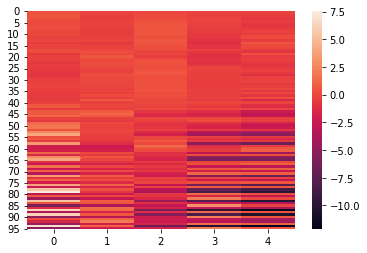

In [ ]:
#DDQN as the high-level agent

import gym
from agents.Trainer import Trainer
from utilities.data_structures.Config import Config

config = Config()
config.seed = 1
config.environment = gym.make("Hopper-v2")
config.num_episodes_to_run = 100 # Controls the number of steps with supervised reward
config.standard_deviation_results = 1.0
config.runs_per_agent = 1 # Choose 1 if you are running out of time
config.use_GPU = torch.cuda.is_available()
config.randomise_random_seed = True

actor_critic_agent_hyperparameters = {
        "Actor": {
            "learning_rate": 0.0003,
            "linear_hidden_units": [64, 64],
            "final_layer_activation": None,
            "batch_norm": False,
            "tau": 0.005,
            "gradient_clipping_norm": 5,
            "initialiser": "Xavier"
        },

        "Critic": {
            "learning_rate": 0.0003,
            "linear_hidden_units": [64, 64],
            "final_layer_activation": None,
            "batch_norm": False,
            "buffer_size": 1000000,
            "tau": 0.005,
            "gradient_clipping_norm": 5,
            "initialiser": "Xavier"
        },

        "min_steps_before_learning": 0,
        "batch_size": 256,
        "discount_rate": 0.99,
        "update_every_n_steps": 1,
        "learning_updates_per_learning_session": 1,
        "entropy_term_weight": 0.1,
        "do_evaluation_iterations": False,
        "training_episodes_per_evaluation_episode": 2,
        "clip_rewards": False
    }

dqn_agent_hyperparameters =   {
        "learning_iterations": 3,
        "learning_rate": 0.005,
        "batch_size": 128,
        "buffer_size": 400000,
        "epsilon": 1.0,
        "epsilon_decay_rate_denominator": 3,
        "discount_rate": 0.99,
        "tau": 0.01,
        "alpha_prioritised_replay": 0.6,
        "beta_prioritised_replay": 0.1,
        "incremental_td_error": 1e-8,
        "update_every_n_steps": 3,
        "linear_hidden_units": [30, 15],
        "final_layer_activation": "None",
        "batch_norm": False,
        "gradient_clipping_norm": 5,
        "clip_rewards": False
    }


# You can choose to use SAC as the manager agent.
actor_critic_manager = False
if actor_critic_manager:
    manager_hyperparameters = copy.deepcopy(actor_critic_agent_hyperparameters)
    manager_hyperparameters['Actor'].update({"final_layer_activation": "Softmax"})
else:
    manager_hyperparameters = dqn_agent_hyperparameters
manager_hyperparameters.update({"timesteps_to_give_up_control_for": 20})


config.hyperparameters = {
    "Policy_Gradient_Agents": {
        "learning_rate": 0.05,
        "linear_hidden_units": [30, 15],
        "final_layer_activation": "TANH",
        "learning_iterations_per_round": 10,
        "discount_rate": 0.9,
        "batch_norm": False,
        "clip_epsilon": 0.2,
        "episodes_per_learning_round": 10,
        "normalise_rewards": True,
        "gradient_clipping_norm": 5,
        "mu": 0.0,
        "theta": 0.15,
        "sigma": 0.2,
        "epsilon_decay_rate_denominator": 1,
        "clip_rewards": False
    },
    "DQN_Agents": dqn_agent_hyperparameters,
    "Actor_Critic_Agents": actor_critic_agent_hyperparameters,
    "DIAYN": {
        "DISCRIMINATOR": {
            "learning_rate": 0.001,
            "linear_hidden_units": [32, 32],
            "final_layer_activation": None,
            "gradient_clipping_norm": 5

        },
        "AGENT": actor_critic_agent_hyperparameters,
        "MANAGER": manager_hyperparameters,
        "num_skills": 5,
        "num_unsupservised_episodes": 100 # Controls the number of steps with unsupervised reward in DIAYN
    }
}

# Trains the agent
AGENTS = [DIAYN, SAC]
trainer = Trainer(config, AGENTS)
_ = trainer.run_games_for_agents()

AGENT NAME: DIAYN
1.1: DIAYN
TITLE  Hopper
Score required to win set to infinity therefore no learning rate annealing will happen
layer info  [32, 32, 5]
layer info  [32, 32, 5]
TITLE  Hopper
Score required to win set to infinity therefore no learning rate annealing will happen
layer info  [64, 64, 1]
layer info  [64, 64, 1]
layer info  [64, 64, 1]
layer info  [64, 64, 1]
layer info  [64, 64, 1]
layer info  [64, 64, 1]
layer info  [64, 64, 1]
layer info  [64, 64, 1]
layer info  [64, 64, 6]
layer info  [64, 64, 6]
TITLE  Hopper
Score required to win set to infinity therefore no learning rate annealing will happen
layer info  [64, 64, 5]
layer info  [64, 64, 5]
layer info  [64, 64, 5]
layer info  [64, 64, 5]
layer info  [64, 64, 5]
layer info  [64, 64, 5]
layer info  [64, 64, 5]
layer info  [64, 64, 5]
layer info  [64, 64, 5]
layer info  [64, 64, 5]
{'DISCRIMINATOR': {'learning_rate': 0.001, 'linear_hidden_units': [32, 32], 'final_layer_activation': None, 'gradient_clipping_norm': 5, 'ou

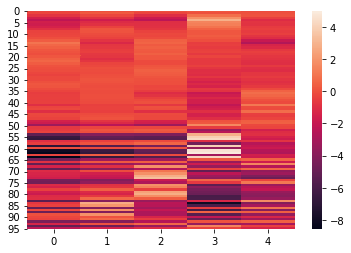

In [ ]:
#SAC as the manager agent

import gym
from agents.Trainer import Trainer
from utilities.data_structures.Config import Config

config = Config()
config.seed = 1
config.environment = gym.make("Hopper-v2")
config.num_episodes_to_run = 100 # Controls the number of steps with supervised reward
config.standard_deviation_results = 1.0
config.runs_per_agent = 1 # Choose 1 if you are running out of time
config.use_GPU = torch.cuda.is_available()
config.randomise_random_seed = True

actor_critic_agent_hyperparameters = {
        "Actor": {
            "learning_rate": 0.0003,
            "linear_hidden_units": [64, 64],
            "final_layer_activation": None,
            "batch_norm": False,
            "tau": 0.005,
            "gradient_clipping_norm": 5,
            "initialiser": "Xavier"
        },

        "Critic": {
            "learning_rate": 0.0003,
            "linear_hidden_units": [64, 64],
            "final_layer_activation": None,
            "batch_norm": False,
            "buffer_size": 1000000,
            "tau": 0.005,
            "gradient_clipping_norm": 5,
            "initialiser": "Xavier"
        },

        "min_steps_before_learning": 0,
        "batch_size": 256,
        "discount_rate": 0.99,
        "update_every_n_steps": 1,
        "learning_updates_per_learning_session": 1,
        "entropy_term_weight": 0.1,
        "do_evaluation_iterations": False,
        "training_episodes_per_evaluation_episode": 2,
        "clip_rewards": False
    }

dqn_agent_hyperparameters =   {
        "learning_iterations": 3,
        "learning_rate": 0.005,
        "batch_size": 128,
        "buffer_size": 400000,
        "epsilon": 1.0,
        "epsilon_decay_rate_denominator": 3,
        "discount_rate": 0.99,
        "tau": 0.01,
        "alpha_prioritised_replay": 0.6,
        "beta_prioritised_replay": 0.1,
        "incremental_td_error": 1e-8,
        "update_every_n_steps": 3,
        "linear_hidden_units": [30, 15],
        "final_layer_activation": "None",
        "batch_norm": False,
        "gradient_clipping_norm": 5,
        "clip_rewards": False
    }


# You can choose to use SAC as the manager agent.
actor_critic_manager = True
if actor_critic_manager:
    manager_hyperparameters = copy.deepcopy(actor_critic_agent_hyperparameters)
    manager_hyperparameters['Actor'].update({"final_layer_activation": "Softmax"})
else:
    manager_hyperparameters = dqn_agent_hyperparameters
manager_hyperparameters.update({"timesteps_to_give_up_control_for": 20})


config.hyperparameters = {
    "Policy_Gradient_Agents": {
        "learning_rate": 0.05,
        "linear_hidden_units": [30, 15],
        "final_layer_activation": "TANH",
        "learning_iterations_per_round": 10,
        "discount_rate": 0.9,
        "batch_norm": False,
        "clip_epsilon": 0.2,
        "episodes_per_learning_round": 10,
        "normalise_rewards": True,
        "gradient_clipping_norm": 5,
        "mu": 0.0,
        "theta": 0.15,
        "sigma": 0.2,
        "epsilon_decay_rate_denominator": 1,
        "clip_rewards": False
    },
    "DQN_Agents": dqn_agent_hyperparameters,
    "Actor_Critic_Agents": actor_critic_agent_hyperparameters,
    "DIAYN": {
        "DISCRIMINATOR": {
            "learning_rate": 0.001,
            "linear_hidden_units": [32, 32],
            "final_layer_activation": None,
            "gradient_clipping_norm": 5

        },
        "AGENT": actor_critic_agent_hyperparameters,
        "MANAGER": manager_hyperparameters,
        "num_skills": 5,
        "num_unsupservised_episodes": 100 # Controls the number of steps with unsupervised reward in DIAYN
    }
}

# Trains the agent
AGENTS = [DIAYN, SAC]
trainer = Trainer(config, AGENTS)
_ = trainer.run_games_for_agents()

###Questions (15 + 10 points)

**NOTE:** 
+ Considering the compute constraints you have, it is not expected to solve the task in each run or get the absolute positive results that are expected, but your implementations and justifications matter.
+ You can try each experiment three times and report the mean and standard deviation of your results.

1) What skills does DIAYN learn? Visualize the learned skills using the `show_video` method. Also, plot each dimension of the visited states per skill separately and discuss the patterns present in different skills. (5 points)

2) How does the distribution of skills change during training? You can use a heat map to plot the produced distribution at every training step or its average per episode. (5 points)

It is plotted at the end of training.


3) Use `DDQN` as the high-level agent and compare its performance on `Hopper-v2` to the non-hierarchical `SAC`. Plot the learning curve for both agents in the same figure (rolling score vs. episode). (5 points)

You can access the rolling score via the `rolling_results` attribute of each base agent (e.g. `diayn_agent.manager_agent.rolling_results` or `sac_agent.rolling_results`). Each entry in this array (per run) is the averaged score of the last few steps the agent has tried.

4) Does a `SAC` agent perform better than `DDQN` as the high-level agent for this environment? You can repeat the experiments for `SAC_Discrete` and justify your observations. (+10 points)

As we can see from previous executed cells SAC agent perform better than DDQN as the high-level agent for this environment